In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits, load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
class_name = ['Not Spam', 'Spam']
label_to_class = {
    0: 'Not Spam',
    1: 'Spam'
}
class_to_label = {
    value: key
    for key, value in label_to_class.items()
}
print(X, X.shape)
print(y, y.shape)
print('Targets:', [label_to_class[i] for i in y])
print(label_to_class)
print(class_to_label)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] (10, 1)
[0 0 0 0 1 1 1 1 1 1] (10,)
Targets: ['Not Spam', 'Not Spam', 'Not Spam', 'Not Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam']
{0: 'Not Spam', 1: 'Spam'}
{'Not Spam': 0, 'Spam': 1}


In [3]:
# Definisi Model
model = LogisticRegression(solver = 'liblinear', random_state=11)
model

LogisticRegression(random_state=11, solver='liblinear')

In [4]:
model.fit(X, y)

LogisticRegression(random_state=11, solver='liblinear')

In [5]:
print('Classes:', model.classes_)
print('Weights:', model.coef_)
print('Bias:', model.intercept_)
print('n Iteration:', model.n_iter_)

Classes: [0 1]
Weights: [[0.51491375]]
Bias: [-1.04608067]
n Iteration: [6]


In [6]:
model.predict_proba(X)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [8]:
prediction = model.predict(X)
print('Prediction:', prediction)
print('Targets:', y)
print('Prediction Class:', )
print()
print('Prediction Class:', [label_to_class[i] for i in prediction])
print('Target Class:', [label_to_class[i] for i in y])

Prediction: [0 0 0 1 1 1 1 1 1 1]
Targets: [0 0 0 0 1 1 1 1 1 1]
Prediction Class:

Prediction Class: ['Not Spam', 'Not Spam', 'Not Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam']
Target Class: ['Not Spam', 'Not Spam', 'Not Spam', 'Not Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam']


In [9]:
model_score = model.score(X, y)
print('Score:', model_score)

Score: 0.9


In [10]:
confusion_matrix(y, prediction)

array([[3, 1],
       [0, 6]], dtype=int64)

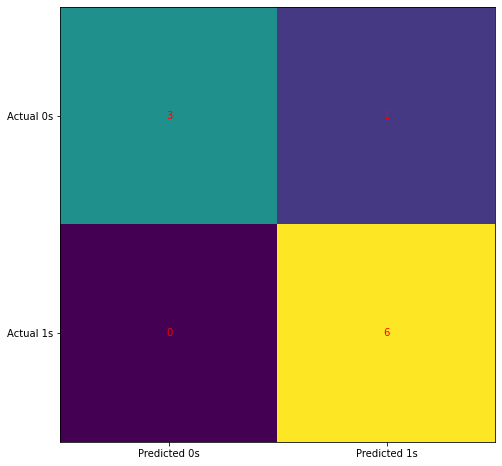

In [15]:
cm = confusion_matrix(y, prediction)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
        

In [16]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [20]:
X, y = load_digits(return_X_y=True)

In [21]:
print('Dataset Shape:', X.shape)
print('Target Shape:', y.shape)

Dataset SHape: (1797, 64)
Target Shape: (1797,)


In [22]:
print (X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=111)
print('Training Set Shape:', X_train.shape)
print('Test Set Shape:', X_test.shape)

Training Set Shape: (1437, 64)
Test Set Shape: (360, 64)


## Scaler

In [26]:
print('Before Scaling Data:')
print(X_train[:5])
print(X_test[:5])

Before Scaling Data:
[[ 0.  0.  3. 15. 16. 16. 12.  0.  0.  0. 12. 12.  7. 16.  6.  0.  0.  4.
  12.  0.  9. 13.  0.  0.  0.  0.  1.  1. 13.  7.  0.  0.  0.  0.  8. 13.
  16. 16.  6.  0.  0.  0. 12. 15. 12.  6.  1.  0.  0.  0.  0. 15.  5.  0.
   0.  0.  0.  0.  3. 16.  2.  0.  0.  0.]
 [ 0.  2.  9. 11. 12. 15.  6.  0.  0.  6. 16.  9.  8.  8.  1.  0.  0.  4.
  13.  0.  0.  0.  0.  0.  0.  4. 16. 12. 11.  5.  0.  0.  0.  1.  5.  4.
   8. 14.  5.  0.  0.  0.  0.  0.  0.  8.  8.  0.  0.  1.  6.  4.  5. 15.
   3.  0.  0.  3. 16. 16. 16.  8.  0.  0.]
 [ 0.  0.  6. 12. 16. 10.  0.  0.  0.  4. 15.  8. 12. 14.  0.  0.  0.  0.
   0.  0. 13.  8.  0.  0.  0.  0.  0.  6. 14.  1.  0.  0.  0.  0.  0.  5.
  15.  8.  0.  0.  0.  0.  0.  0.  2. 15.  5.  0.  0.  0.  1.  4.  5. 15.
   8.  0.  0.  0.  5. 16. 14.  9.  1.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.  0.  2. 16. 14. 14. 14.  0.  0.  0.  2.
  14.  4. 14. 10.  0.  0.  0.  0.  0.  8. 16.  8.  0.  0.  0.  0.  0.  0.
   8. 16.  6.  0.  0.  0.  0.  0.  0

In [31]:
##Scaling Process
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
print('After Scaling Data:')
print(X_train[:5])
print(X_test[:5])

After Scaling Data:
[[ 0.00000000e+00 -3.35150624e-01 -4.73128609e-01  7.43064836e-01
   9.70988363e-01  1.81050738e+00  3.22283070e+00 -1.29737637e-01
  -5.01149787e-02 -6.34247931e-01  2.72410162e-01  3.47599586e-04
  -6.94511047e-01  1.28981872e+00  1.13866717e+00 -1.32944585e-01
  -2.63889907e-02  3.92196637e-01  3.44973933e-01 -1.20956234e+00
   3.04876340e-01  8.34717807e-01 -5.46683761e-01 -1.13506694e-01
  -2.63889907e-02 -7.85595556e-01 -1.30870879e+00 -1.33156188e+00
   5.00996086e-01 -9.05352464e-02 -6.26915500e-01 -5.28331981e-02
   0.00000000e+00 -6.63580903e-01  6.25443843e-02  6.24184923e-01
   9.58805678e-01  1.23024481e+00  8.84774018e-01  0.00000000e+00
  -5.18044323e-02 -5.24481863e-01  7.94217140e-01  1.21609910e+00
   6.90955808e-01 -3.93299947e-01 -5.74512958e-01 -8.71856088e-02
  -3.96300945e-02 -4.01377453e-01 -1.33698248e+00  1.04098390e+00
  -8.49792425e-01 -1.45401261e+00 -7.64883609e-01 -2.10910431e-01
  -2.63889907e-02 -3.02408810e-01 -5.10857985e-01  8.828

## Logstic Regression

In [34]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state= 111)
model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=111,
                   solver='liblinear')

In [38]:
print('--Training Set Performance--')
train_pred = model.predict(X_train)
print(classification_report(y_train, train_pred))

print('--Test Set Performance--')
test_pred = model.predict(X_test)
print(classification_report(y_test, test_pred))

--Training Set Performance--
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       142
           1       0.93      0.97      0.95       143
           2       0.97      1.00      0.99       145
           3       0.99      0.97      0.98       148
           4       1.00      0.98      0.99       143
           5       0.97      0.98      0.97       147
           6       0.99      0.99      0.99       143
           7       0.97      0.99      0.98       141
           8       0.95      0.89      0.92       138
           9       0.93      0.93      0.93       147

    accuracy                           0.97      1437
   macro avg       0.97      0.97      0.97      1437
weighted avg       0.97      0.97      0.97      1437

--Test Set Performance--
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.97      0.92      0.95        39
           2       0.91 

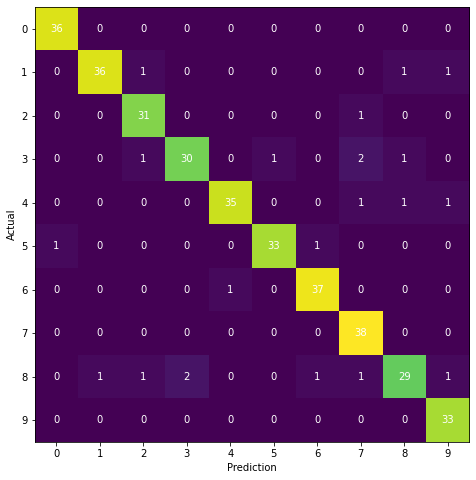

In [45]:
cm = confusion_matrix(y_test, test_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Prediction', color='black')
ax.set_ylabel('Actual', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [54]:
model.coef_

array([[ 0.00000000e+00,  1.48681984e-03, -4.03579624e-02,
         1.73230765e-01, -7.82109461e-02, -2.20559861e-01,
        -2.40143112e-02,  2.18305653e-03, -6.46046056e-03,
        -1.34972556e-01,  3.66588722e-02,  6.84132648e-02,
         3.10202509e-01,  2.83986918e-01, -1.04966311e-02,
        -5.14479206e-02,  7.84968644e-03,  7.31637075e-02,
        -1.13043771e-02, -7.78599250e-03, -1.35950709e-01,
         3.02053385e-01,  5.48443107e-02, -1.73267993e-04,
         1.84161128e-02,  1.75456700e-01,  3.00754279e-02,
        -2.50339288e-01, -4.71905796e-01, -1.35714277e-01,
         1.76205760e-01, -2.52239334e-03,  0.00000000e+00,
         1.38772136e-01,  1.69180181e-01, -3.19341975e-01,
        -3.39262935e-01, -2.13866612e-01,  1.78042430e-01,
         0.00000000e+00, -7.44444889e-03, -6.52792426e-02,
         3.75984883e-01, -3.24684634e-01, -3.27673326e-01,
         2.20717897e-02,  2.17390822e-02,  1.61018258e-02,
        -3.13516972e-02, -1.57188376e-01,  2.16207484e-0

In [55]:
model.coef_.shape

(10, 64)

## K-Nearest Neighbor (KNN)

In [56]:
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
print(len(weather))

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
print(len(temp))

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
print(len(play))

14
14
14


In [60]:
encoder = LabelEncoder()
enc_weather = encoder.fit_transform(weather)
print(enc_weather)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [63]:
enc_temp = encoder.fit_transform(temp)
print(enc_temp)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [70]:
label = encoder.fit_transform(play)
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [64]:
features = list(zip(enc_weather, enc_temp))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [68]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, label)

KNeighborsClassifier(n_neighbors=3)

In [74]:
print(model.predict([[0, 2]]))

[1]


In [76]:
wine = load_wine()

In [78]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [79]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.3, random_state=111)
print('Training Set Shape:', X_train.shape)
print('Test Set Shape:', X_test.shape)

Training Set Shape: (124, 13)
Test Set Shape: (54, 13)


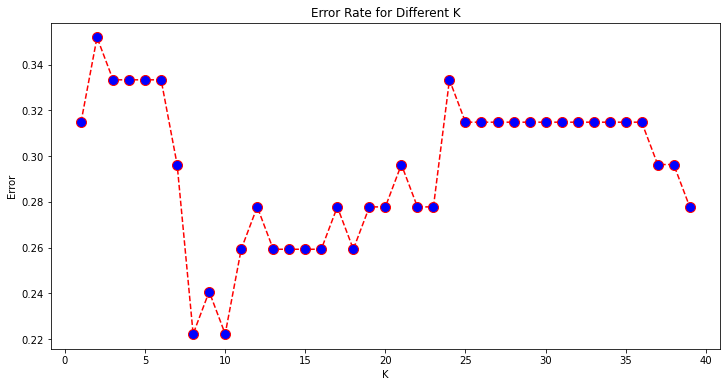

7


In [87]:
error=[]

for k in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    err = np.mean(y_test != pred)
    error.append(err)
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed',
          marker='o', markerfacecolor='blue', markersize = 10)
plt.title('Error Rate for Different K')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

print(np.argmin(error))

In [86]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.74      0.77      0.76        22
           2       0.64      0.60      0.62        15

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54

